In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./Datasets/insurance_data.xlsx')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.shape

(27, 2)

In [4]:
df['bought_insurance'].value_counts()

1    14
0    13
Name: bought_insurance, dtype: int64

In [5]:
x = df[['age']] # x = df.iloc[:,:-1], # x= df.drop('bought_insurance',axis=1) 
y = df['bought_insurance']
print(x.shape)
print(y.shape)

(27, 1)
(27,)


In [6]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(7, 1)
(20,)
(7,)


In [9]:
x_train.head(3)

,age
9,61
1,25
18,19


In [10]:
y.head(3)

0    0
1    0
2    1
Name: bought_insurance, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
print('Trainging accuracy',model.score(x_train,y_train))
print('Testing accuracy',model.score(x_test,y_test))

Trainging accuracy 0.95
Testing accuracy 0.5714285714285714


In [14]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
# [TP FN]
# [FP TN]

[[2 1]
 [2 2]]


In [17]:
res = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
res

,y_test,y_pred
16,1,0
2,1,1
11,0,0
22,1,0
3,0,1
5,1,1
21,0,0


In [18]:
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.67      0.50      0.57         4

    accuracy                           0.57         7
   macro avg       0.58      0.58      0.57         7
weighted avg       0.60      0.57      0.57         7

[[2 1]
 [2 2]]


In [19]:
pre0 = 3/(3+0) # TP/(TP+FP)
pre1 = 3/(3+1) # TN/(TN+FN)
rec0 = 3/(3+1) # TP/(TP+FN)
rec1 = 3/(3+0) # TN/(TN+FP)
print('Precision0',pre0)
print('Precision1',pre1)
print('Recall0',rec0)
print('Recall1',rec1)

Precision0 1.0
Precision1 0.75
Recall0 0.75
Recall1 1.0


In [20]:
f1s0 = 2*pre0*rec0/(pre0+rec0)
f1s1 = 2*pre1*rec1/(pre1+rec1)
print('F1 score_0',f1s0)
print('F1 score_1',f1s1)

F1 score_0 0.8571428571428571
F1 score_1 0.8571428571428571


In [21]:
acc = (3+3)/(3+1+0+3)
print('Accuracy',acc)
print('Testing accuracy',model.score(x_test,y_test))

Accuracy 0.8571428571428571
Testing accuracy 0.5714285714285714


In [22]:
mac_avg_pre = (pre0+ pre1)/2 
mac_avg_rec = (rec0+ rec1)/2
mac_avg_f1 = (f1s0+ f1s1)/2
print('Mac avg_pre',mac_avg_pre)
print('Mac avg_rec',mac_avg_rec)
print('Mac avg_f1',mac_avg_f1)

Mac avg_pre 0.875
Mac avg_rec 0.875
Mac avg_f1 0.8571428571428571


In [23]:
wt_avg_pre = (pre0*4 + pre1*3)/7 
wt_avg_rec = (rec0*4 + rec1*3)/7
wt_avg_f1 = (f1s0*4 + f1s1*3)/7
print('Wt_avg_pre',wt_avg_pre)
print('Wt_avg_rec',wt_avg_rec)
print('Wt_avg_f1',wt_avg_f1)

Wt_avg_pre 0.8928571428571429
Wt_avg_rec 0.8571428571428571
Wt_avg_f1 0.8571428571428571


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.67      0.50      0.57         4

    accuracy                           0.57         7
   macro avg       0.58      0.58      0.57         7
weighted avg       0.60      0.57      0.57         7



In [25]:
a = model.coef_
b = model.intercept_
print('a',a)
print('b',b)
# log(p/(1-p)) = y = ax + b

a [[0.19977309]]
b [-8.28776487]


In [26]:
def sigmoid(x,a,b):
    logit = 1/(1 + np.exp(-(x*a + b)))
    print(logit)

In [27]:
sigmoid(67,a,b)
model.predict([[67]])

[[0.9939223]]


array([1], dtype=int64)

In [28]:
sigmoid(22,a,b)
model.predict([[22]])

[[0.01998165]]


array([0], dtype=int64)

In [29]:
sigmoid(35,a,b)
model.predict([[35]])

[[0.21488847]]


array([0], dtype=int64)

In [30]:
sigmoid(84,a,b)
model.predict([[84]])

[[0.99979518]]


array([1], dtype=int64)

In [31]:
sigmoid(36.4,a,b)
model.predict([[36.4]])

[[0.26580254]]


array([0], dtype=int64)

In [32]:
sigmoid(36.3,a,b)
model.predict([[36.3]])

[[0.26192222]]


array([0], dtype=int64)

In [33]:
sigmoid(37.35,a,b)
model.predict([[37.35]])

[[0.30444072]]


array([0], dtype=int64)

### Plot sigmoid curve

In [34]:
x = np.linspace(2,10,5,dtype=int)
x

array([ 2,  4,  6,  8, 10])

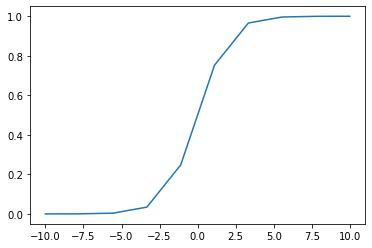

In [35]:
x = np.linspace(-10,10,10)
sigmoid = 1/(1 + np.exp(-x))
plt.plot(x,sigmoid)
plt.show()